In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv(r'C:\Users\pbann\OneDrive\Desktop\science\data set\store sales prediction\train.csv')

BigMart Sales Prediction practice problem

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in features_nan:
    print("The feature is {} and missing values in {}%".format(feature,np.round(df[feature].isnull().mean(),4)))

The feature is Item_Weight and missing values in 0.1717%
The feature is Outlet_Size and missing values in 0.2828%


In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

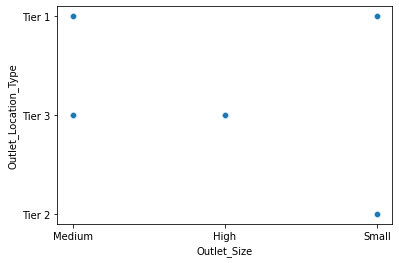

In [10]:
sns.scatterplot(x=df['Outlet_Size'],y=df['Outlet_Location_Type'])

In [11]:
 df.groupby(['Outlet_Location_Type','Outlet_Size']).count()

Item_Identifier  Item_Weight  \
Outlet_Location_Type Outlet_Size                                 
Tier 1               Medium                   930          930   
                     Small                   1458          930   
Tier 2               Small                    930          930   
Tier 3               High                     932          932   
                     Medium                  1863          928   

                                  Item_Fat_Content  Item_Visibility  \
Outlet_Location_Type Outlet_Size                                      
Tier 1               Medium                    930              930   
                     Small                    1458             1458   
Tier 2               Small                     930              930   
Tier 3               High                      932              932   
                     Medium                   1863             1863   

                                  Item_Type  Item_MRP  Outlet_Identifier  \
Outlet_Location_Type Outlet_Size                                           
Tier 1               Medium             930       930                930   
                     Small             1458      1458               1458   
Tier 2               Small              930       930                930   
Tier 3               High               932       932                932   
                     Medium            1863      1863               1863   

                                  Outlet_Establishment_Year  Outlet_Type  \
Outlet_Location_Type Outlet_Size                                           
Tier 1               Medium                             930          930   
                     Small                             1458         1458   
Tier 2               Small                              930          930   
Tier 3               High                               932          932   
                     Medium                            1863         1863   

                                  Item_Outlet_Sales  
Outlet_Location_Type Outlet_Size                     
Tier 1               Medium                     930  
                     Small                     1458  
Tier 2               Small                      930  
Tier 3               High                       932  
                     Medium                    1863

In [12]:
 df.groupby(['Outlet_Location_Type','Outlet_Size'])

In [13]:
 df.groupby('Outlet_Size')

In [14]:
df[['Item_Outlet_Sales','Outlet_Location_Type','Outlet_Size']]

,Item_Outlet_Sales,Outlet_Location_Type,Outlet_Size
0,3735.1380,Tier 1,Medium
1,443.4228,Tier 3,Medium
2,2097.2700,Tier 1,Medium
3,732.3800,Tier 3,NaN
4,994.7052,Tier 3,High
...,...,...,...
8518,2778.3834,Tier 3,High
8519,549.2850,Tier 2,NaN
8520,1193.1136,Tier 2,Small
8521,1845.5976,Tier 3,Medium


In [15]:
df_tier1= df[df['Outlet_Location_Type'] == 'Tier 1']
df_tier1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
10,FDY07,11.80,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
11,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
8492,FDT34,9.30,Low Fat,0.174350,Snack Foods,104.4964,OUT046,1997,Small,Tier 1,Supermarket Type1,2419.5172
8517,FDF53,20.75,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

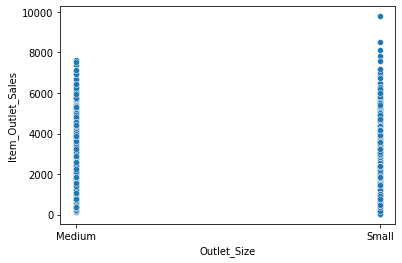

In [16]:
sns.scatterplot(x=df_tier1['Outlet_Size'],y=df['Item_Outlet_Sales'])

In [17]:
pd.pivot_table(df,columns=['Outlet_Location_Type','Outlet_Size'])

Outlet_Location_Type            Tier 1                    Tier 2       Tier 3  \
Outlet_Size                     Medium        Small        Small         High   
Item_MRP                    140.297699   141.235221   143.122481   141.425982   
Item_Outlet_Sales          2348.354635  1576.192909  2438.841866  2298.995256   
Item_Visibility               0.060806     0.077839     0.061263     0.059957   
Item_Weight                  12.917446    12.866801    12.829349    13.006148   
Outlet_Establishment_Year  1999.000000  1992.654321  2004.000000  1987.000000   

Outlet_Location_Type                    
Outlet_Size                     Medium  
Item_MRP                    140.736687  
Item_Outlet_Sales          2847.959679  
Item_Visibility               0.059810  
Item_Weight                  12.873346  
Outlet_Establishment_Year  1996.954911

In [18]:
df.pivot_table(values='Item_Weight', index='Item_Identifier')

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [19]:
m_values=df['Item_Weight'].isnull()

In [20]:
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')

In [21]:
#df.loc[m_values,'Item_Weight'] = df.loc[m_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])

# removing NaN from item_weight

In [22]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [23]:
df['Item_Weight'].mean()

12.857645184136409

# removing NaN from Outlet_size

In [24]:
mode_df=df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_df

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [25]:
miss_values = df['Outlet_Size'].isnull()

In [26]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_df[x])

In [27]:
df.loc[miss_values, 'Outlet_Size']

3       Small
8       Small
9       Small
25      Small
28      Small
        ...  
8502    Small
8508    Small
8509    Small
8514    Small
8519    Small
Name: Outlet_Size, Length: 2410, dtype: object

In [28]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
X = df.iloc[:,:-1]
y=df['Item_Outlet_Sales']

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

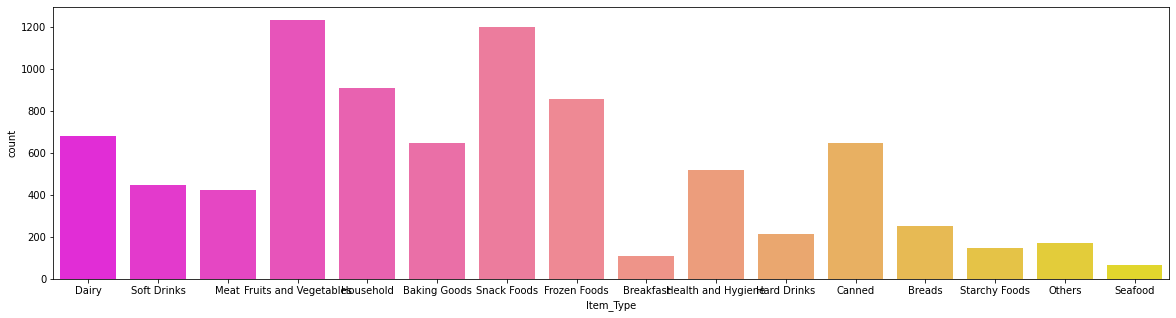

In [34]:
plt.figure(figsize=(20,5))
sns.countplot('Item_Type',data=df,palette='spring')

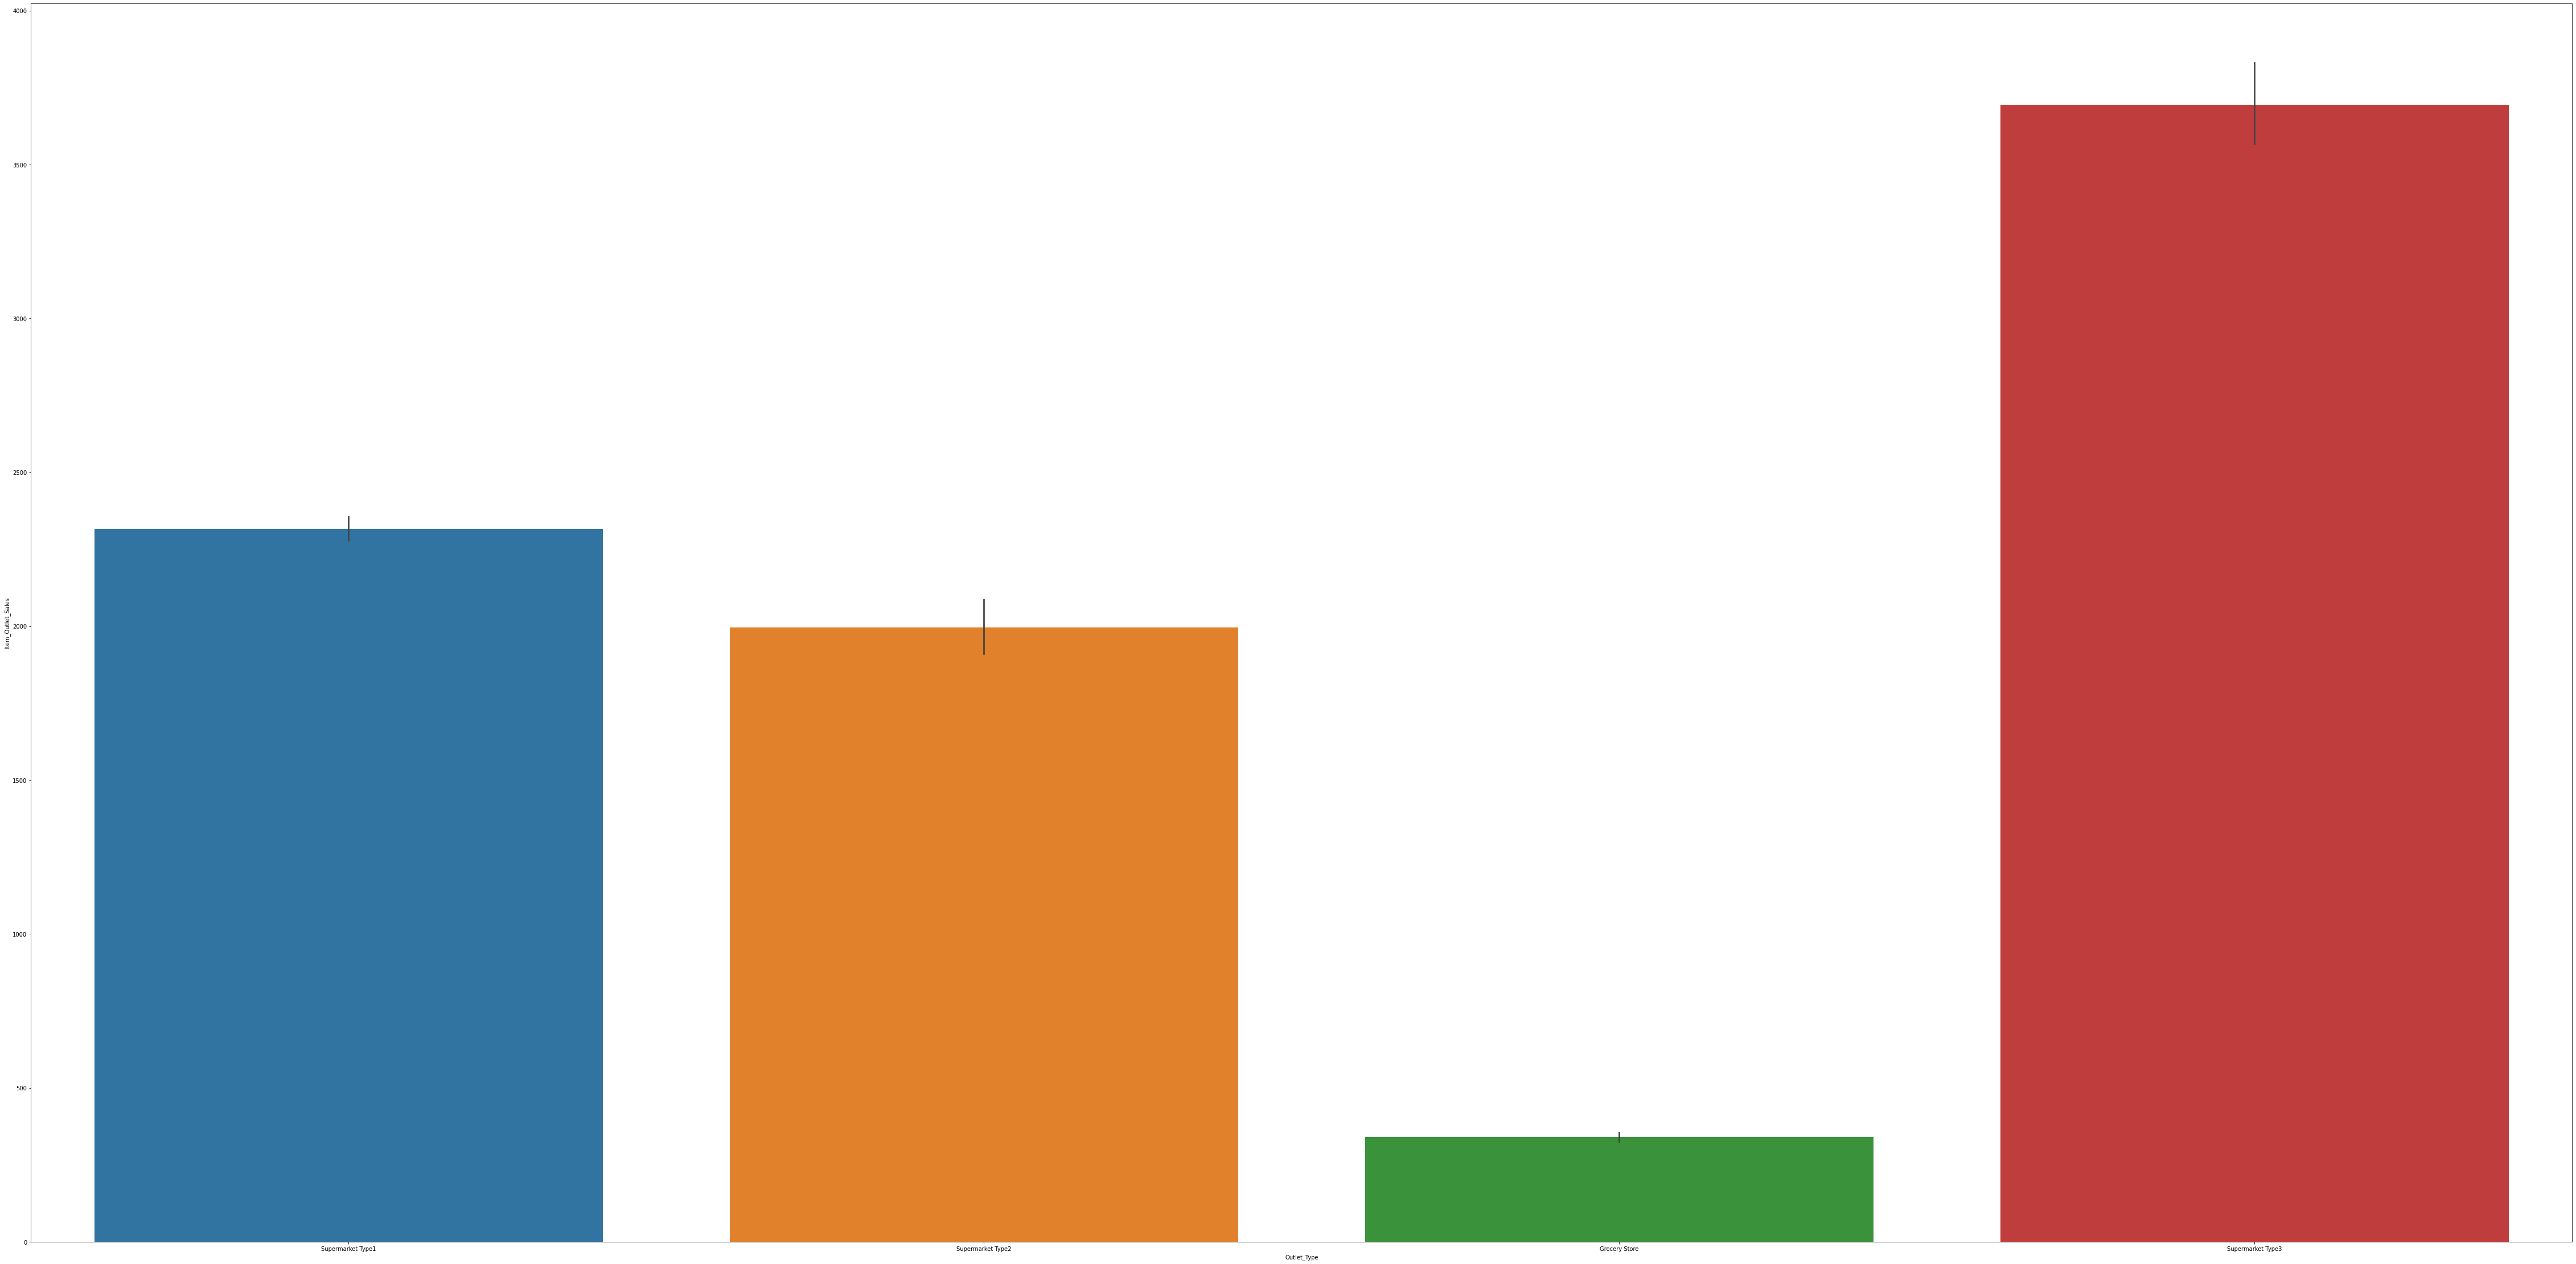

In [35]:
fig=plt.figure(figsize=(80,40))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)
plt.rcParams.update({'font.size': 80},)

# Grocery store sales are very poor

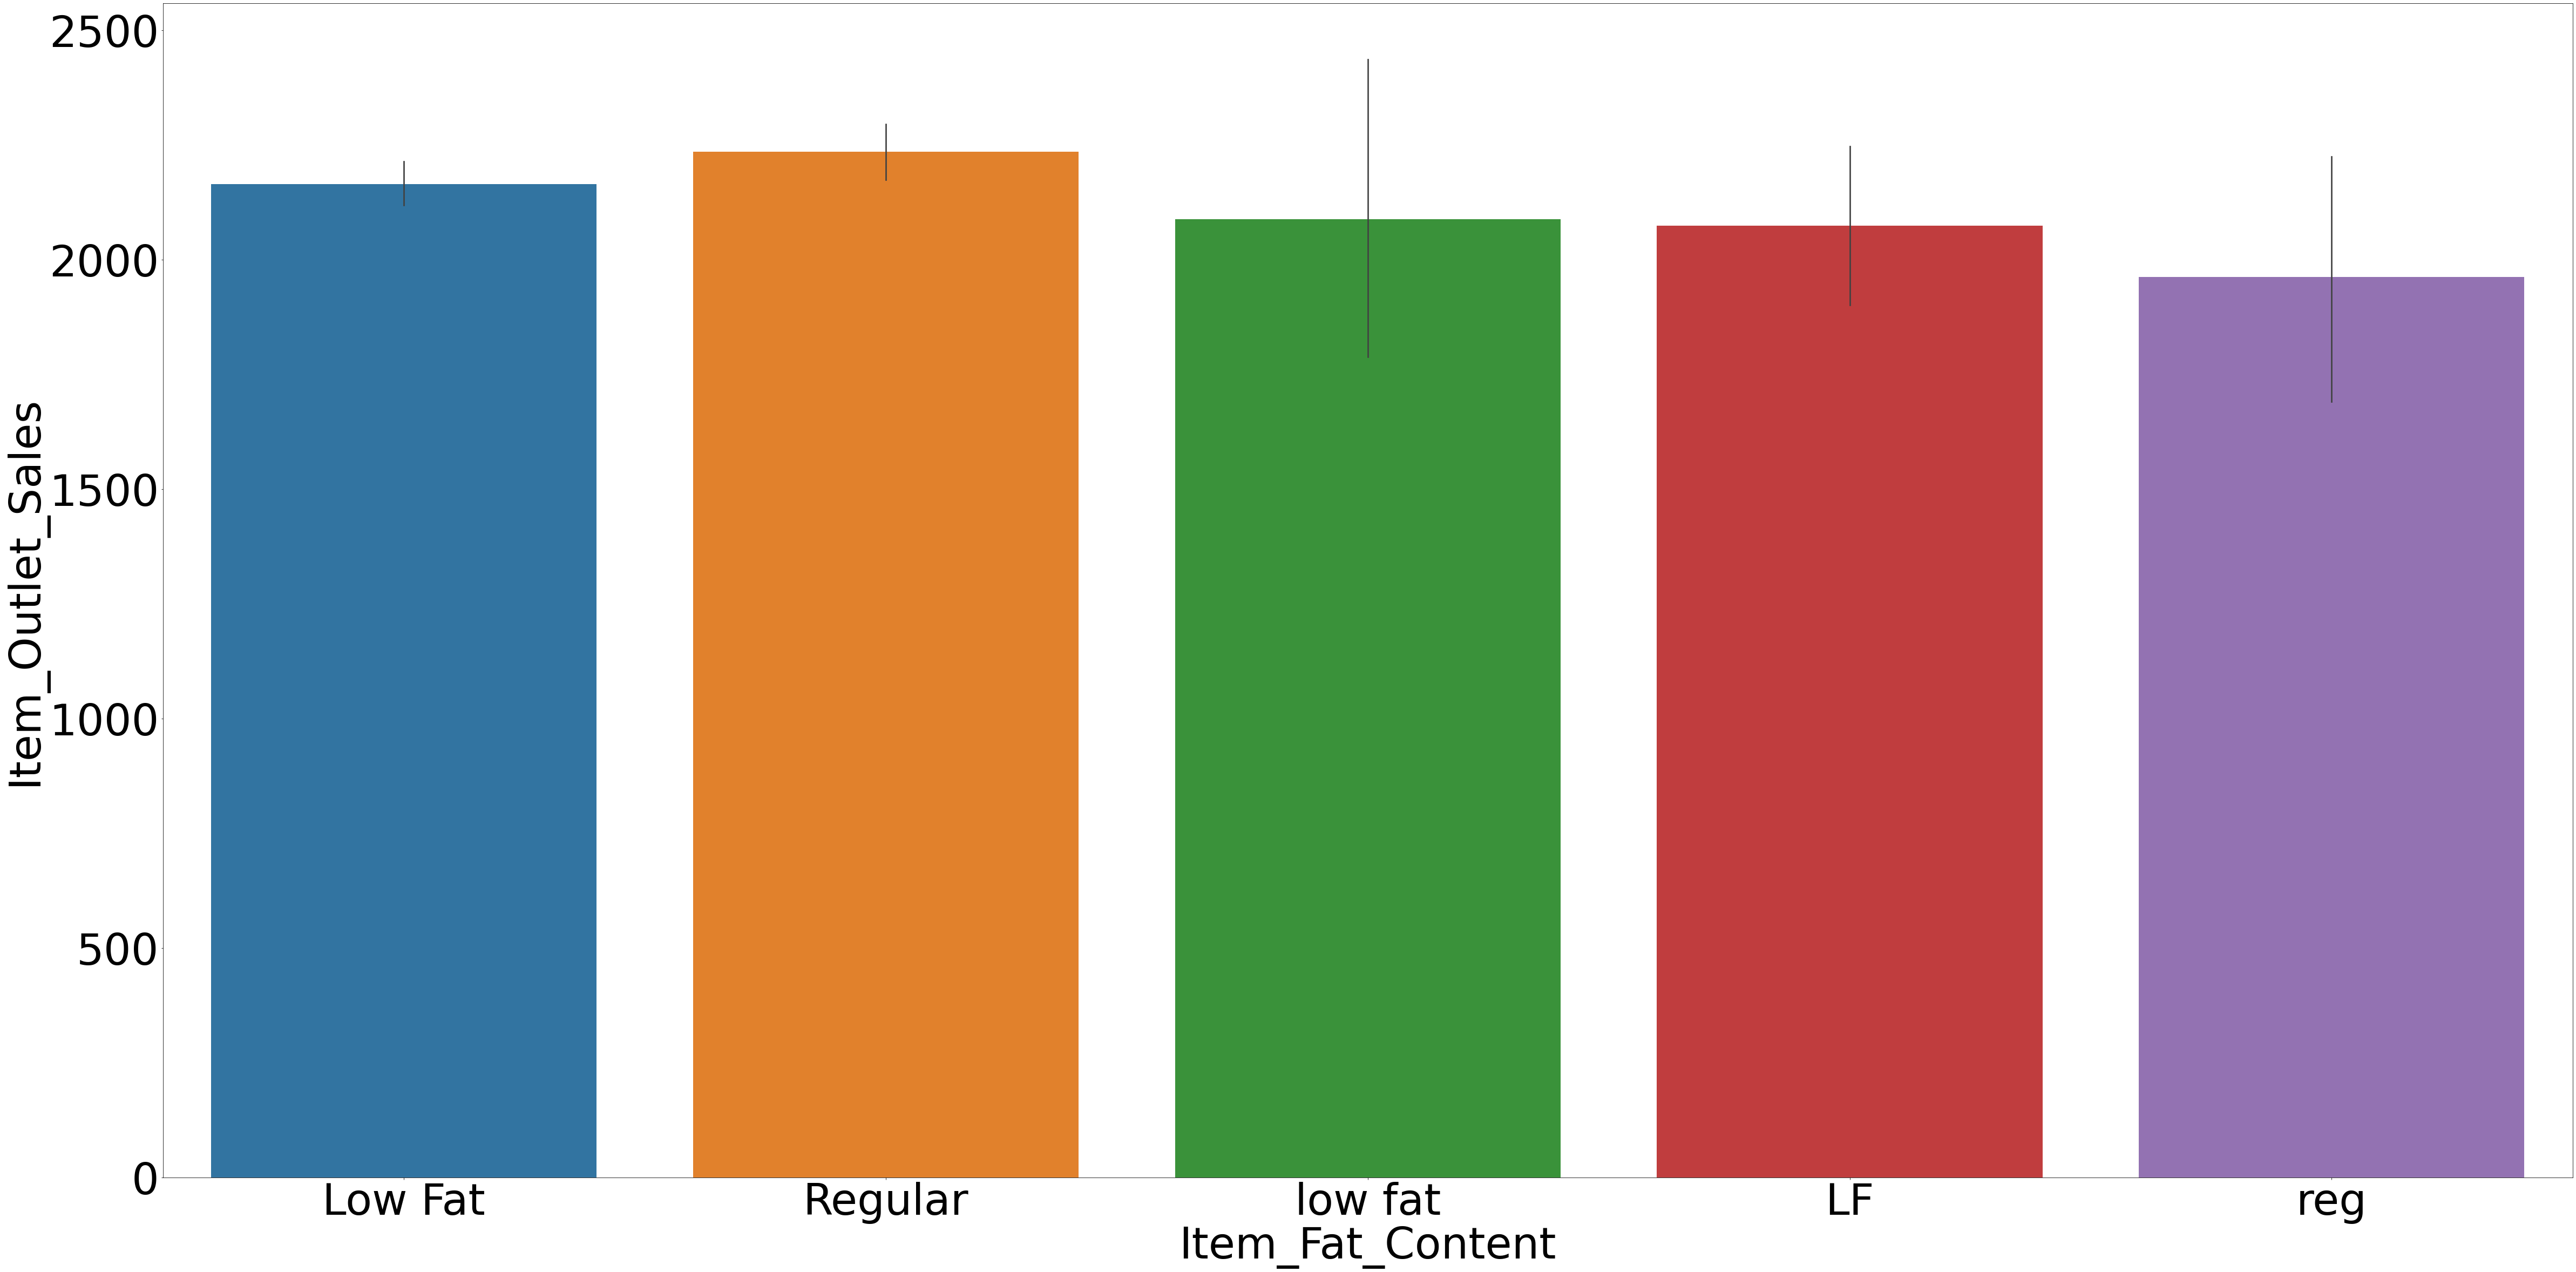

In [36]:
fig=plt.figure(figsize=(80,40))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)
plt.rcParams.update({'font.size': 80},)

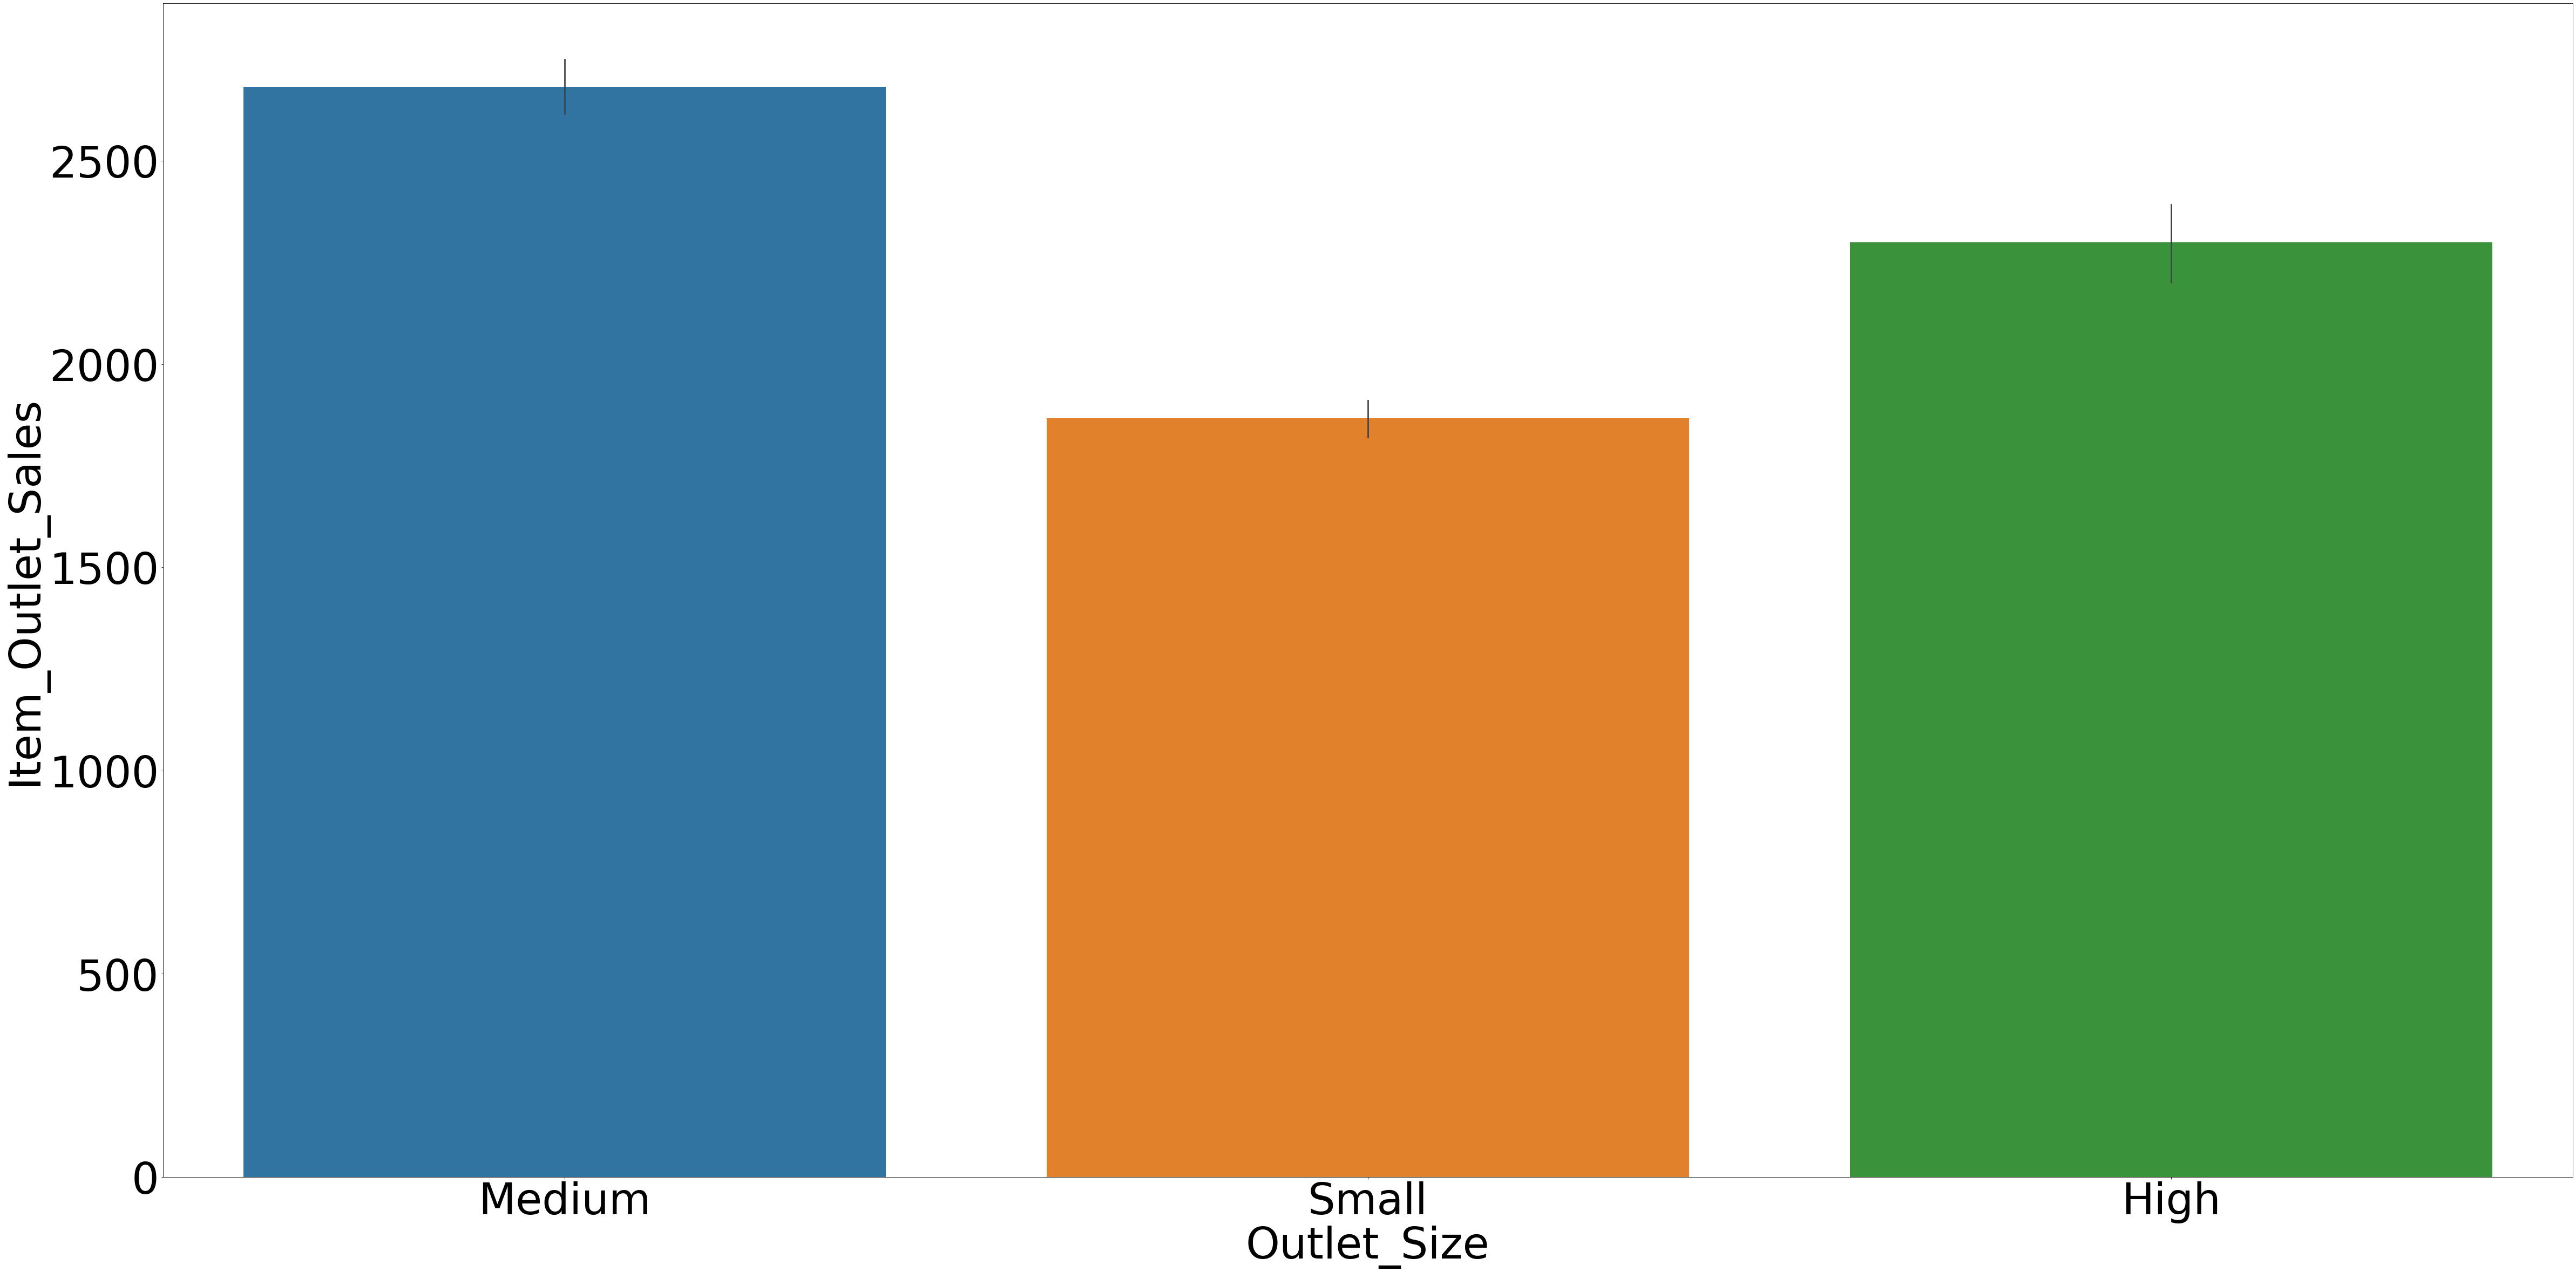

In [37]:
fig=plt.figure(figsize=(80,40))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)
plt.rcParams.update({'font.size': 80},)

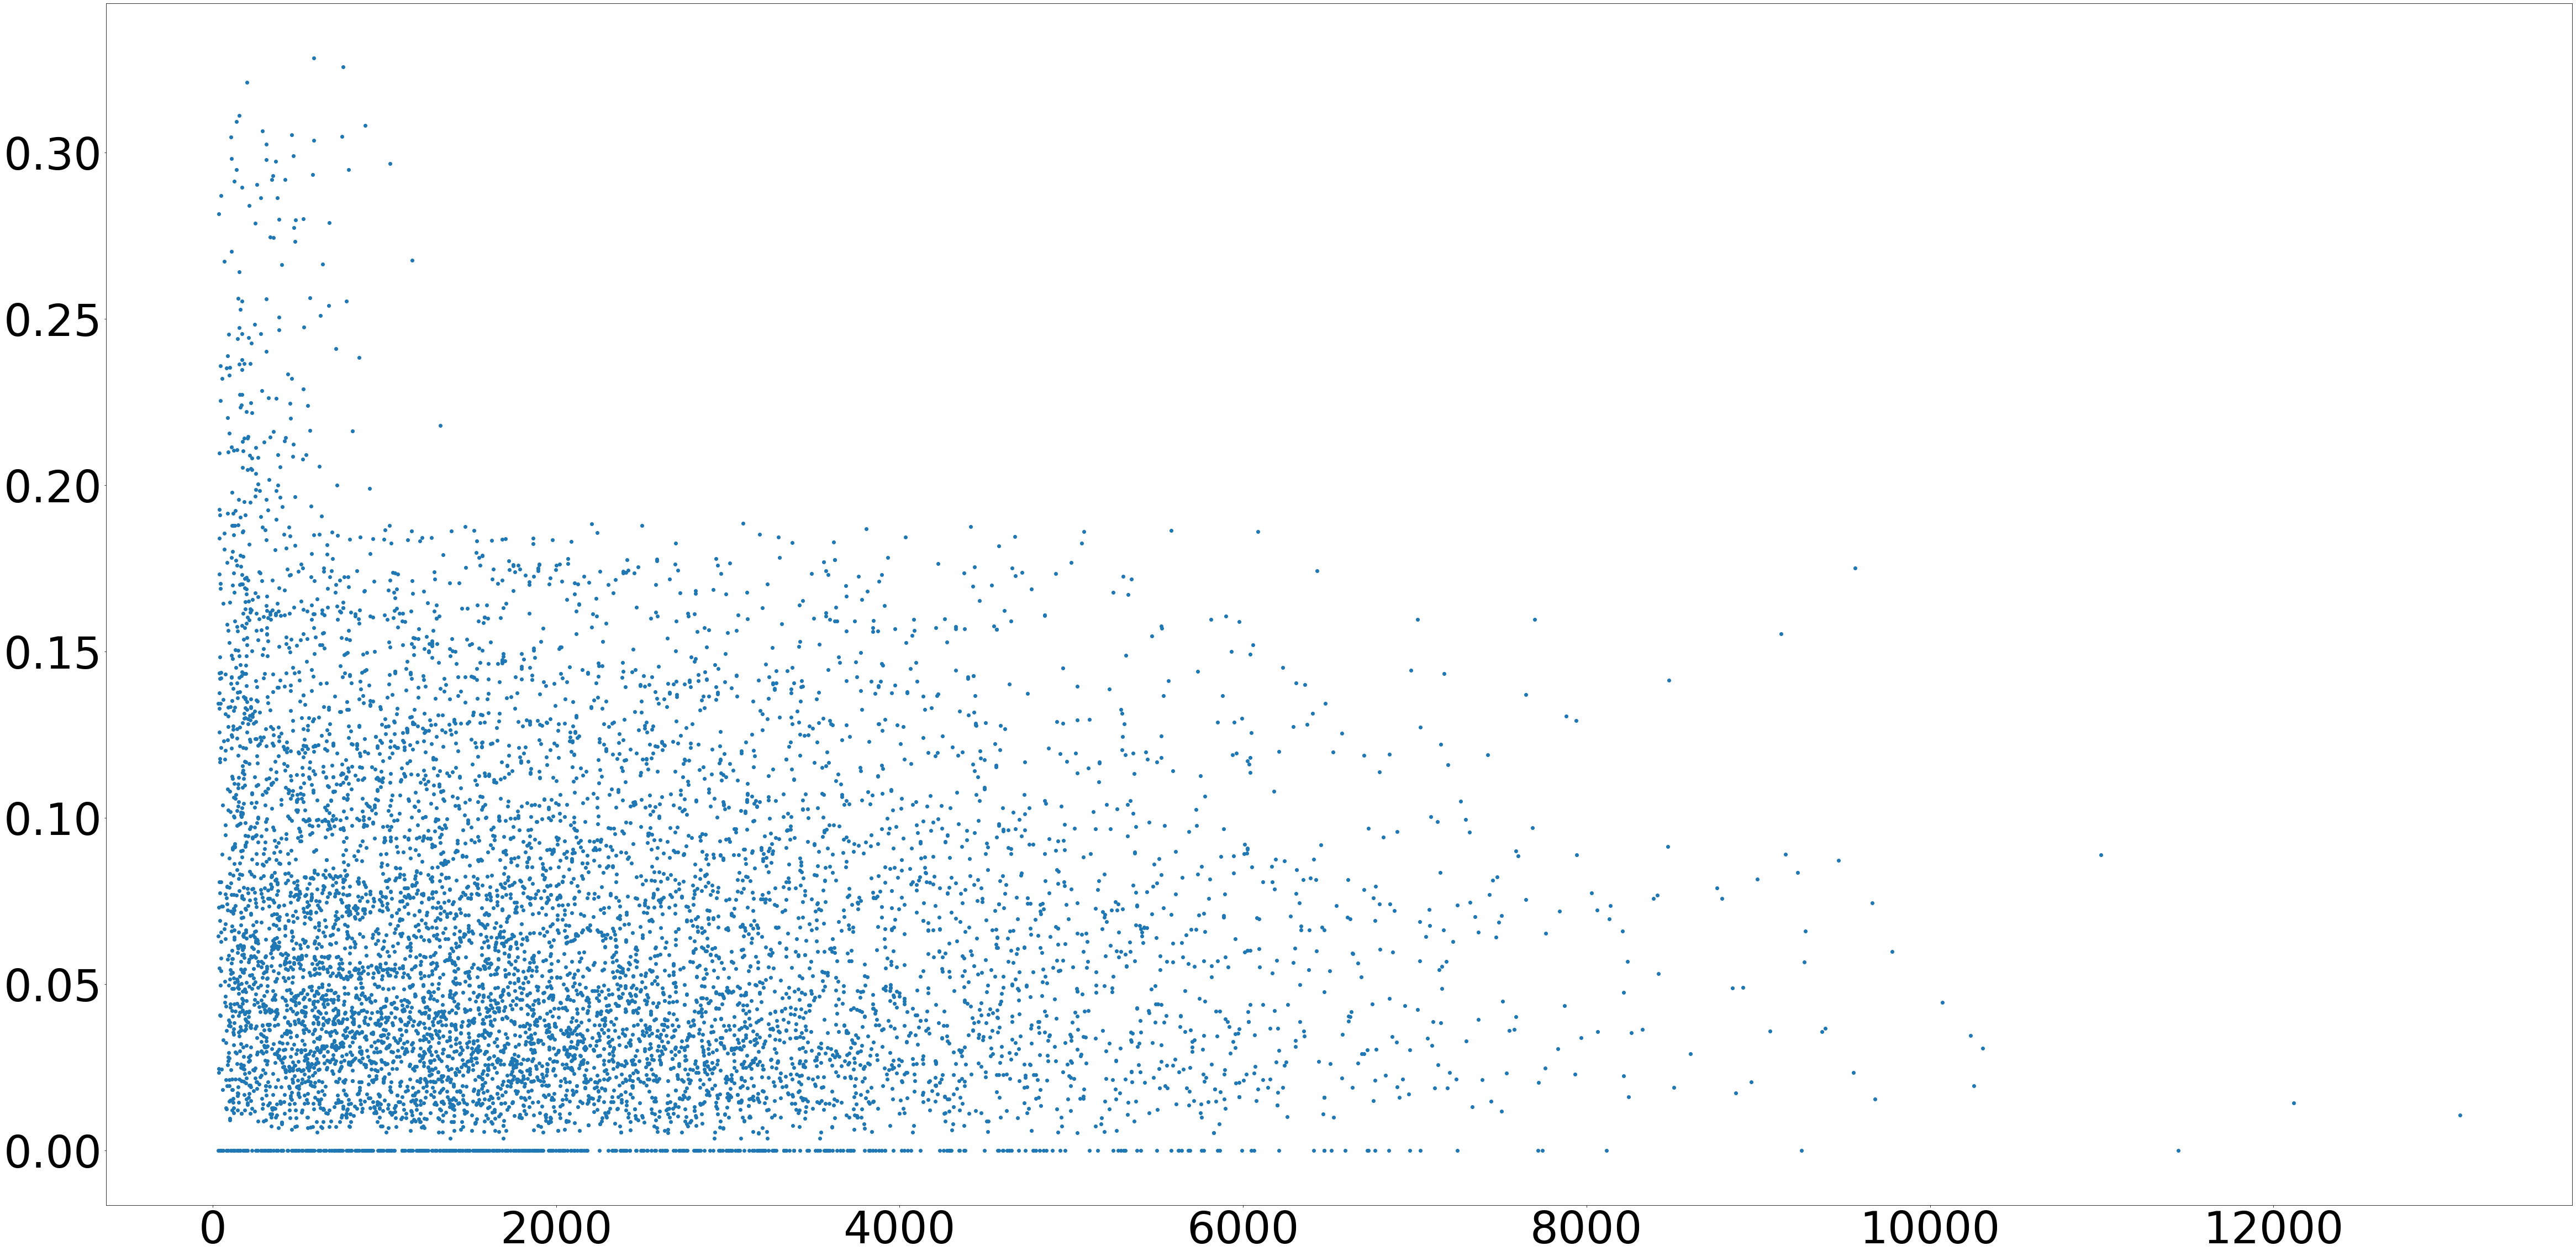

In [38]:
fig=plt.figure(figsize=(80,40))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=df)
plt.rcParams.update({'font.size': 80})

In [39]:
df[df['Item_Visibility'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.857645,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865000,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200000,Low Fat,0.0,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1,1637.8680


# visibility ==0 is not possible as there are sales for those so considering these as NAN values

In [40]:
mean = df.Item_Visibility.mean()
mean

0.06613202877895127

In [41]:
df[df['Item_Visibility'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.857645,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865000,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200000,Low Fat,0.0,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1,1637.8680


In [42]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [43]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())

In [44]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

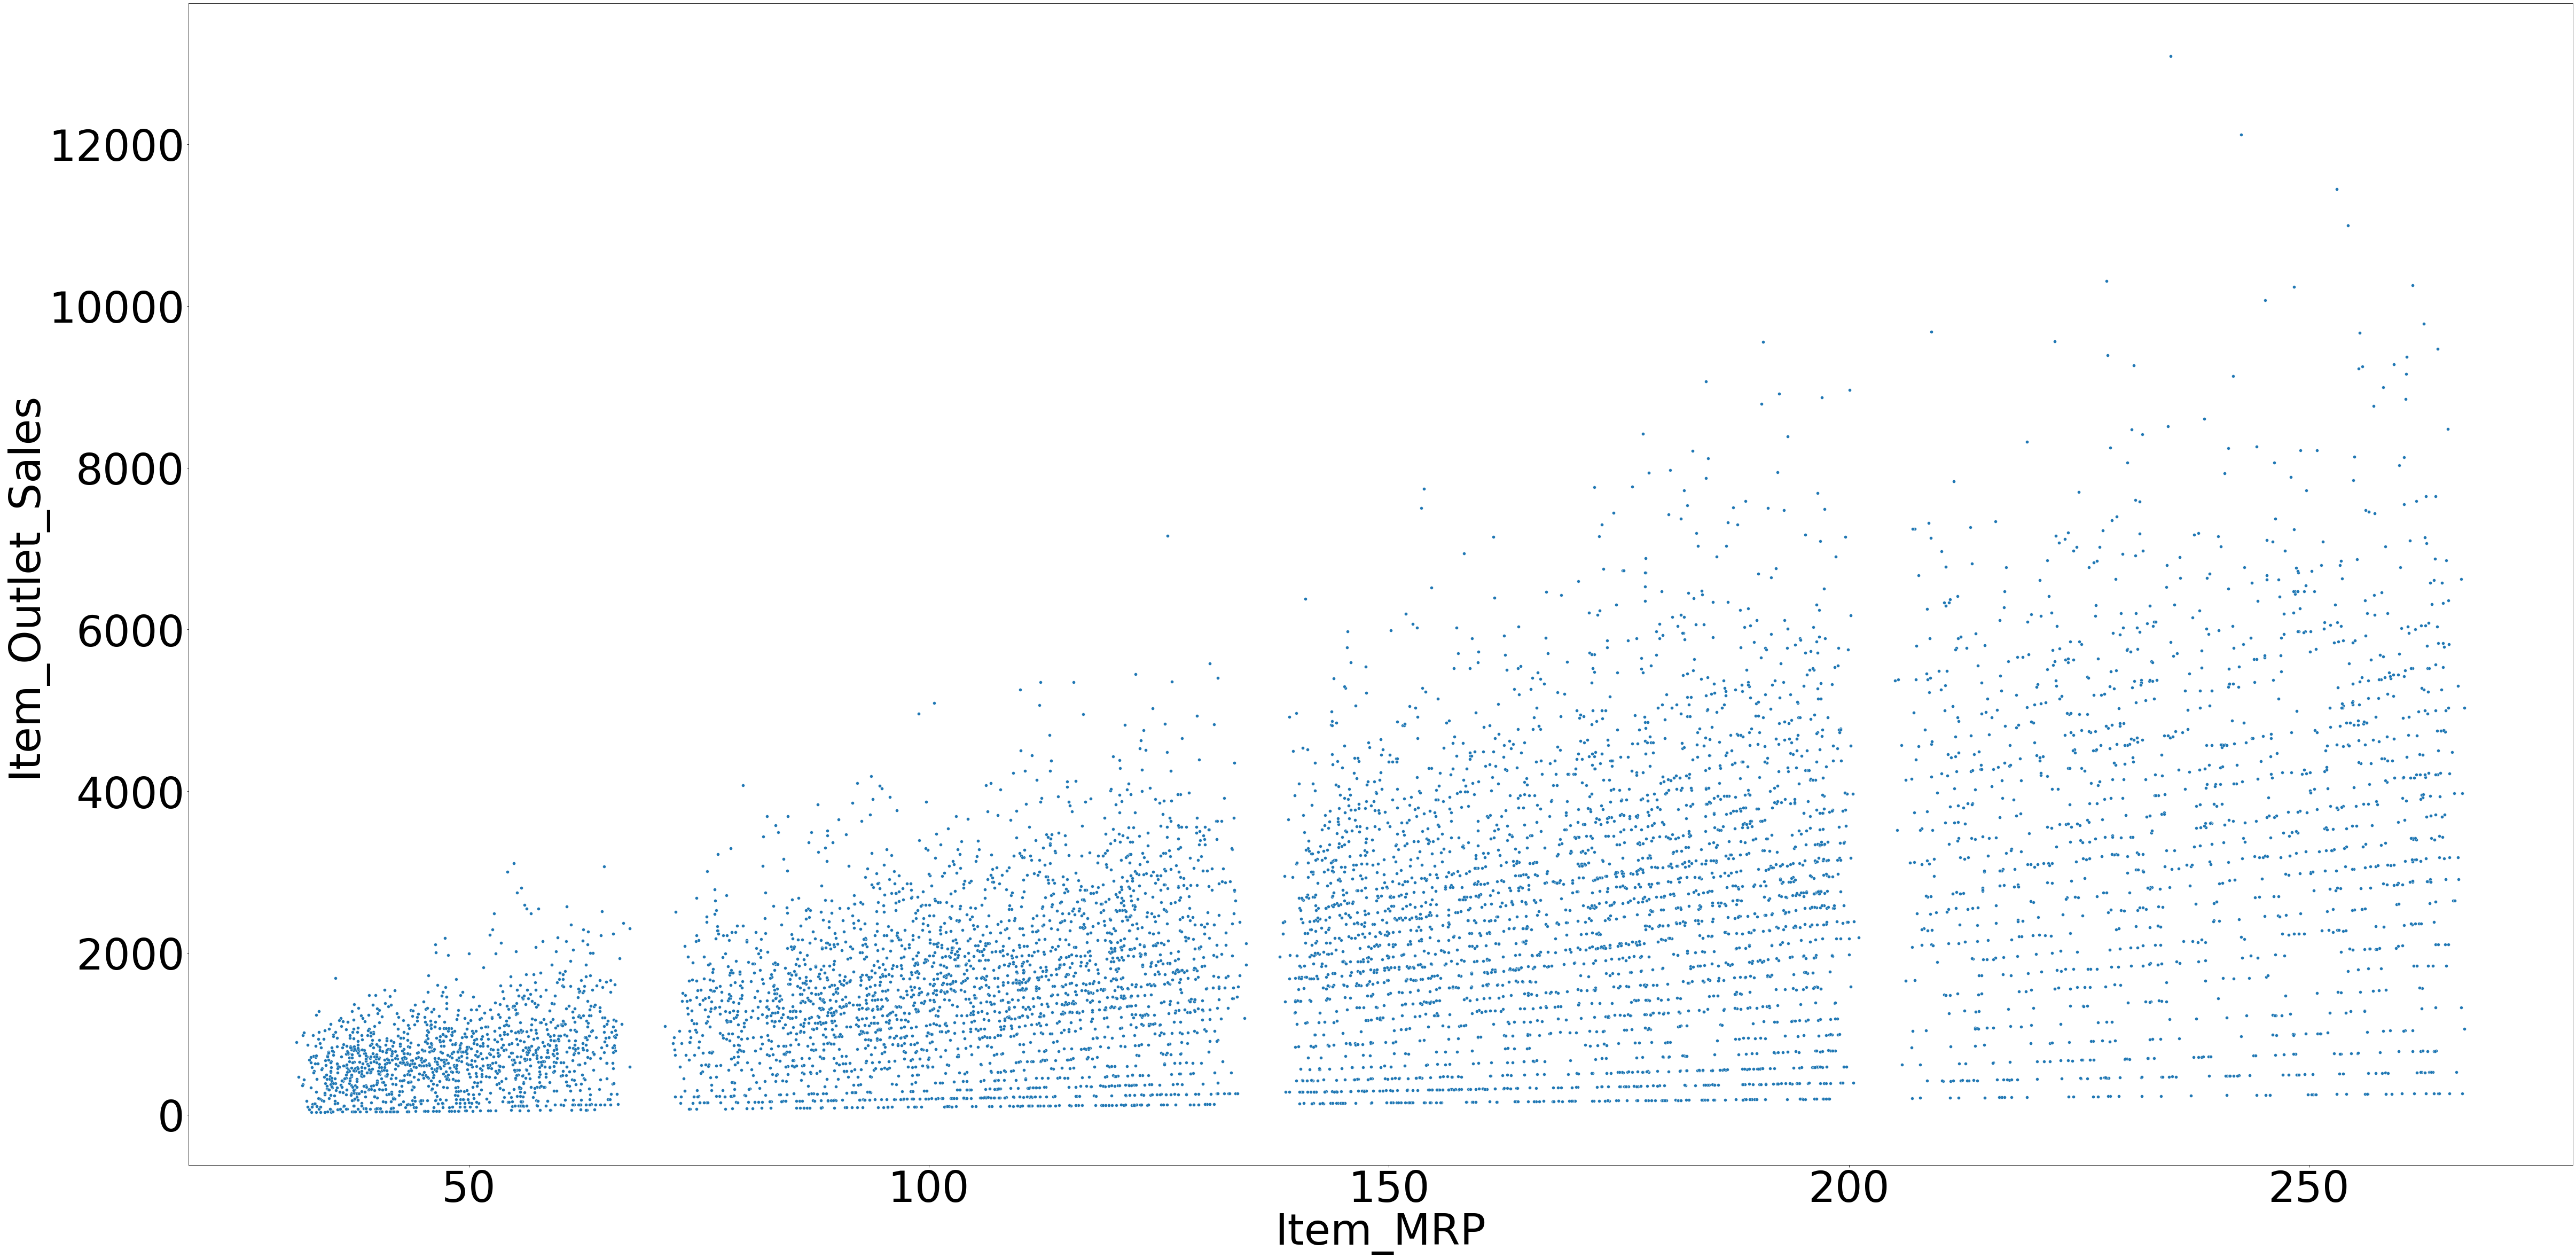

In [45]:
fig=plt.figure(figsize=(80,40))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)
plt.rcParams.update({'font.size': 40},)

# MRP range 200-250 has highest sales

C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


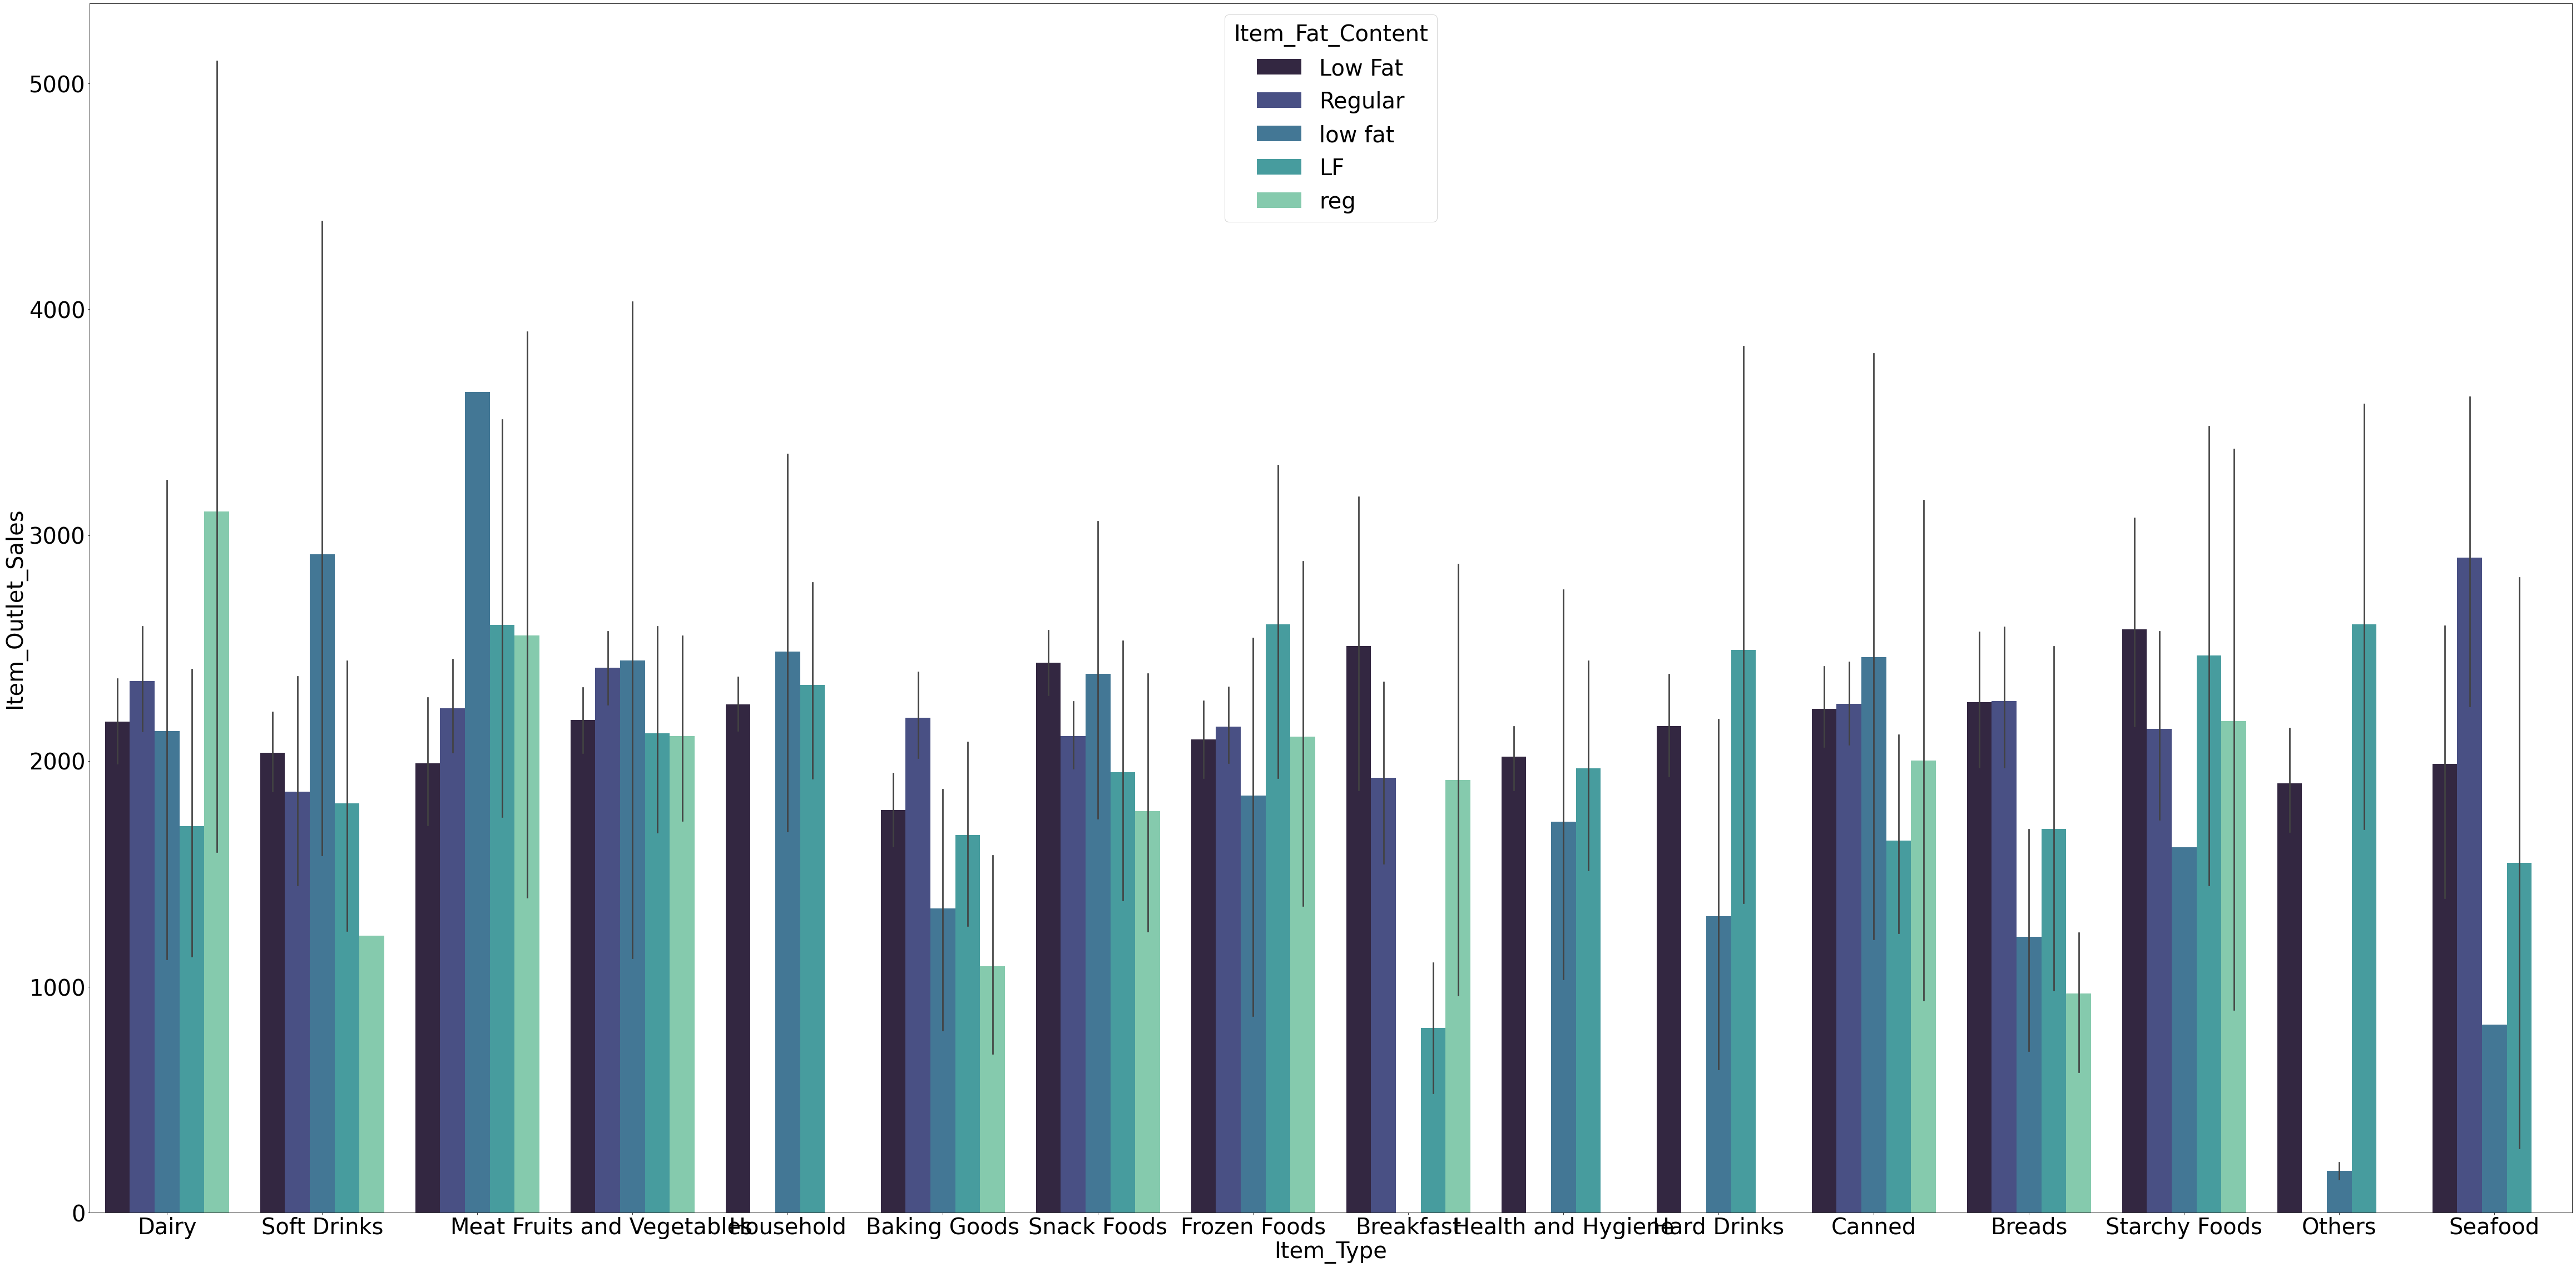

In [46]:
fig=plt.figure(figsize=(80,40))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df,palette='mako')
plt.rcParams.update({'font.size': 40})

C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


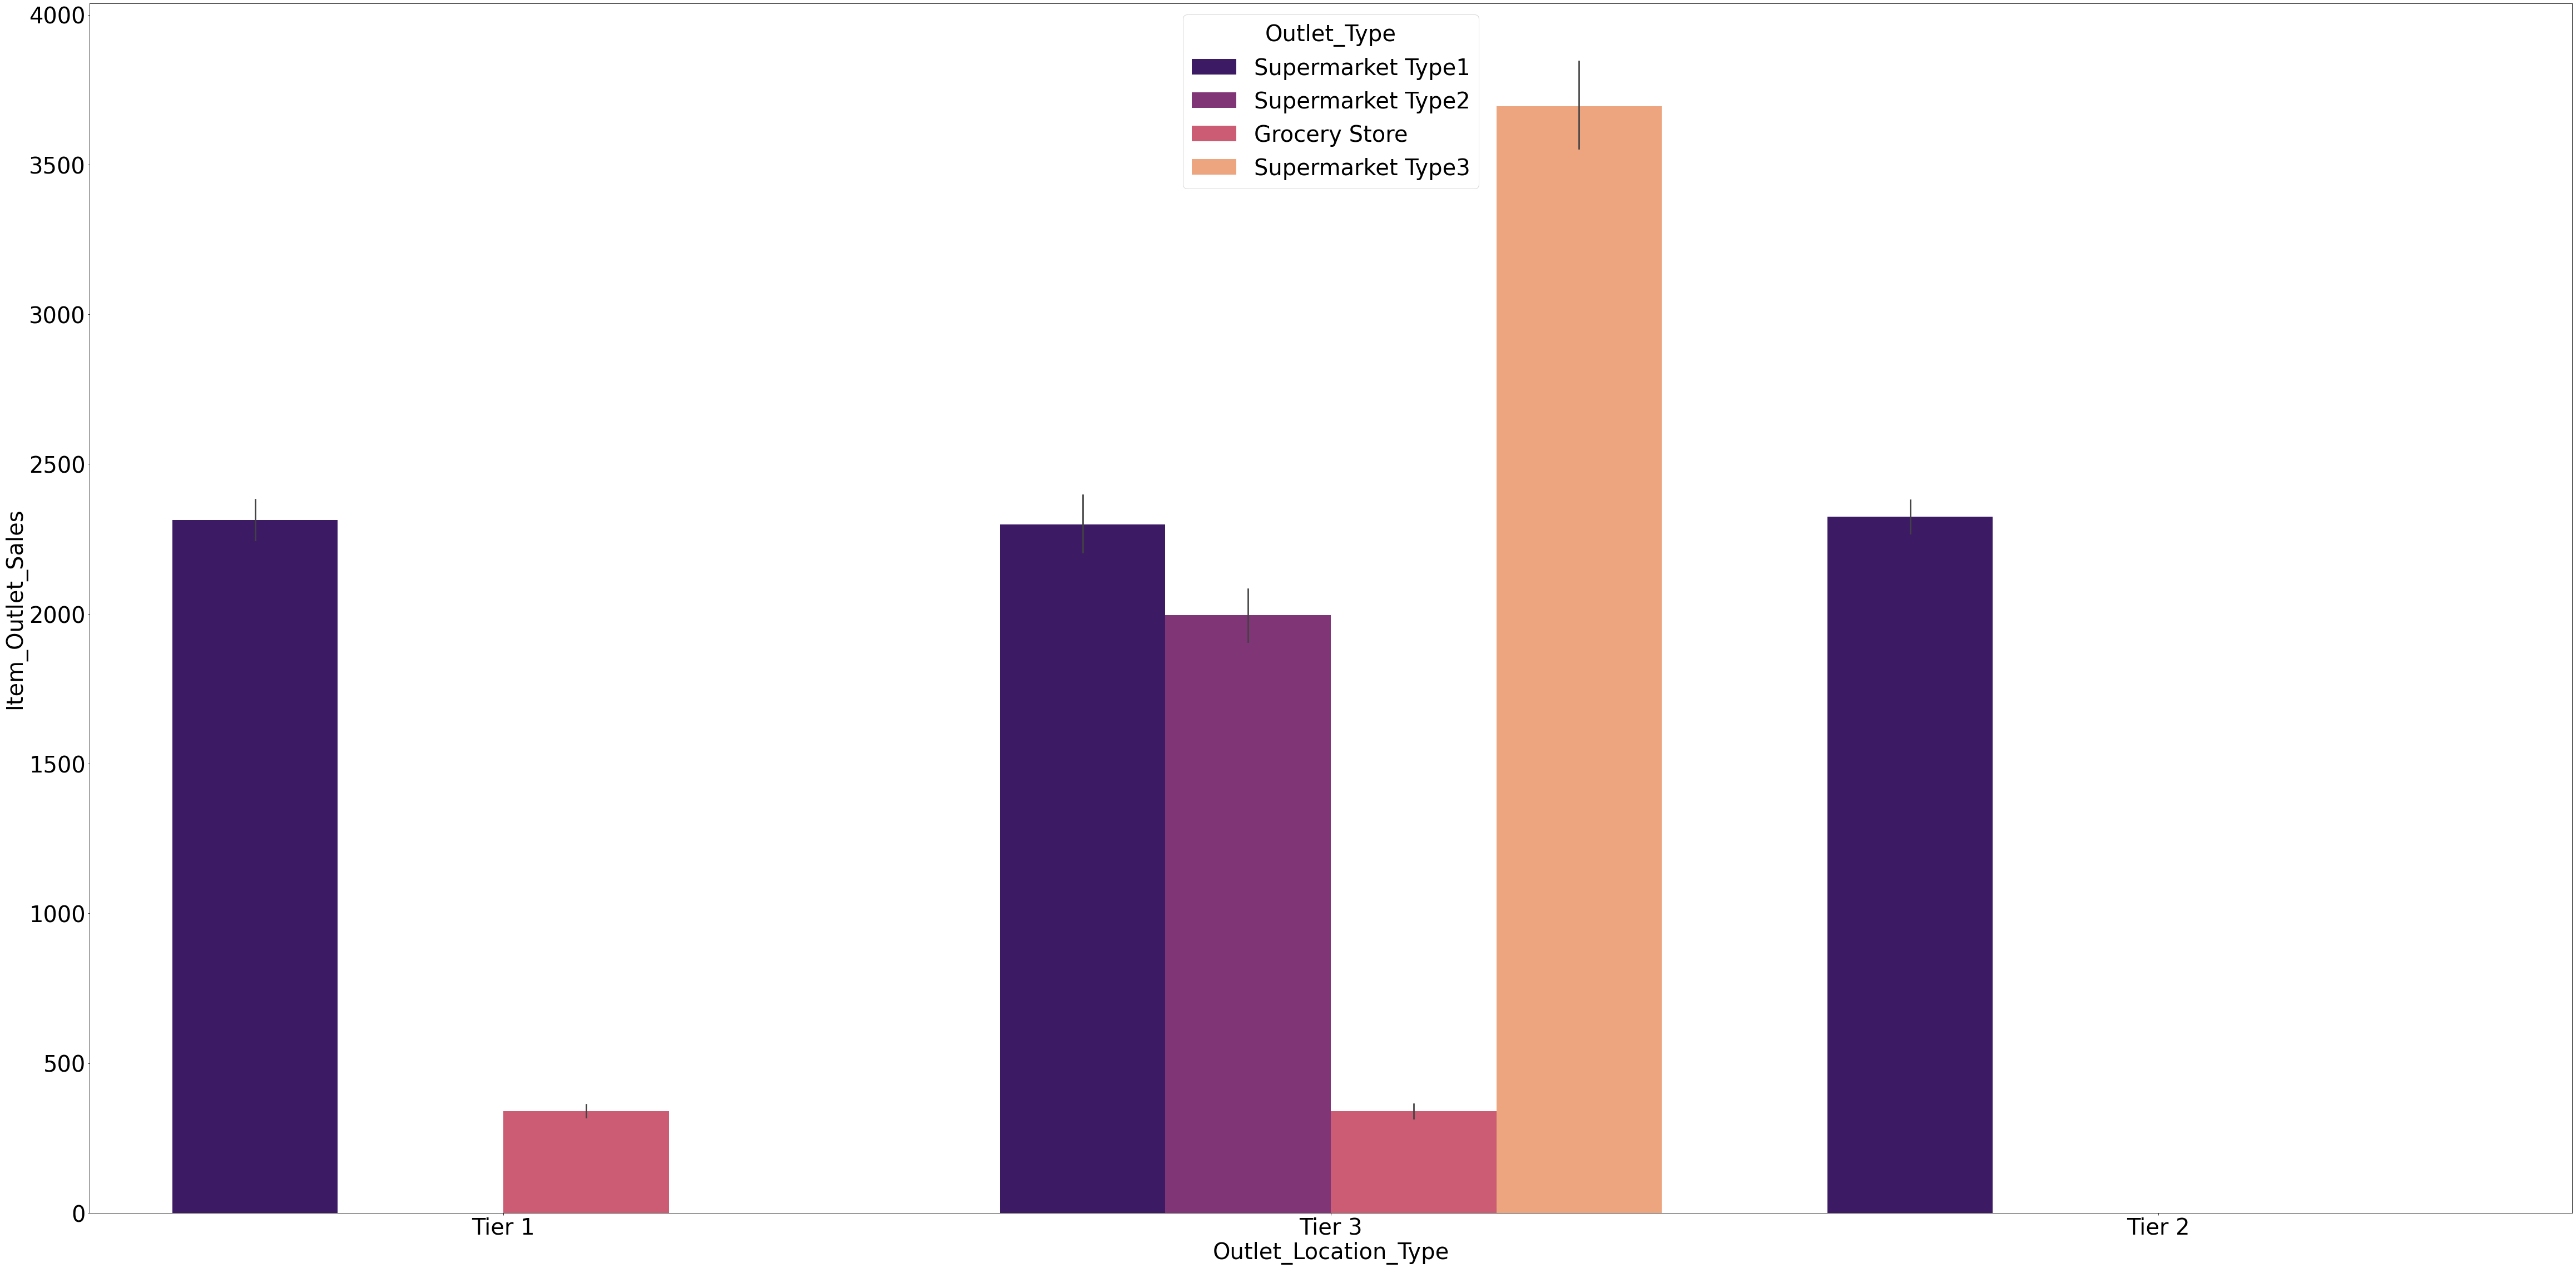

In [47]:
fig=plt.figure(figsize=(80,40))

sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='magma')
plt.rcParams.update({'font.size': 40})

In [48]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [49]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [52]:


df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])



df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [53]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.930,1,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,2,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976


In [54]:
#mean_ordinal=df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().to_dict()

In [55]:
#mean_ordinal

In [56]:
#mean_ordinal1=df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().to_dict()

In [57]:
#mean_ordinal1

In [58]:
#mean_ordinal3=df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().to_dict()

In [59]:
#mean_ordinal3

In [60]:
#df['Outlet_Location_Type']=df['Outlet_Location_Type'].map({'Tier 1': 1876,'Tier 2': 2323,'Tier 3': 2279})

In [61]:
#df['Outlet_Size']=df['Outlet_Size'].map({'High': 2298,'Medium': 2681,'Small': 1867})

In [62]:
#df['Outlet_Type']=df['Outlet_Type'].map({'Grocery Store': 339,
 'Supermarket Type1': 2316,
 'Supermarket Type2': 1995,
 'Supermarket Type3': 3694})

IndentationError: unexpected indent (Temp/ipykernel_23508/3877972294.py, line 2)

In [63]:
#df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':0, 'Regular':1, 'low fat':0, 'LF':0, 'reg':1})

In [64]:
df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [65]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.066132,6,182.0950,1998,2,2,0,732.3800
4,8.930,1,0.066132,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [66]:
df['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12],
      dtype=int64)

In [67]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.017450,0.028015,0.024756,-0.008301,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.033004,-0.115958,-0.000876,-0.000189,-0.008770,-0.004102,-0.004214,0.009800
Item_Visibility,-0.017450,0.033004,1.000000,-0.036000,-0.005259,-0.078355,0.097533,-0.027859,-0.179604,-0.134138
Item_Type,0.028015,-0.115958,-0.036000,1.000000,0.032651,0.004970,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.024756,-0.000876,-0.005259,0.032651,1.000000,0.005020,0.000872,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,-0.000189,-0.078355,0.004970,0.005020,1.000000,0.425534,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.014105,-0.008770,0.097533,-0.000218,0.000872,0.425534,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.004088,-0.004102,-0.027859,0.003084,0.000232,-0.089216,-0.480075,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,-0.179604,0.003053,-0.001975,-0.122304,-0.401373,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.009800,-0.134138,0.017048,0.567574,-0.049135,-0.162753,0.089367,0.401522,1.000000


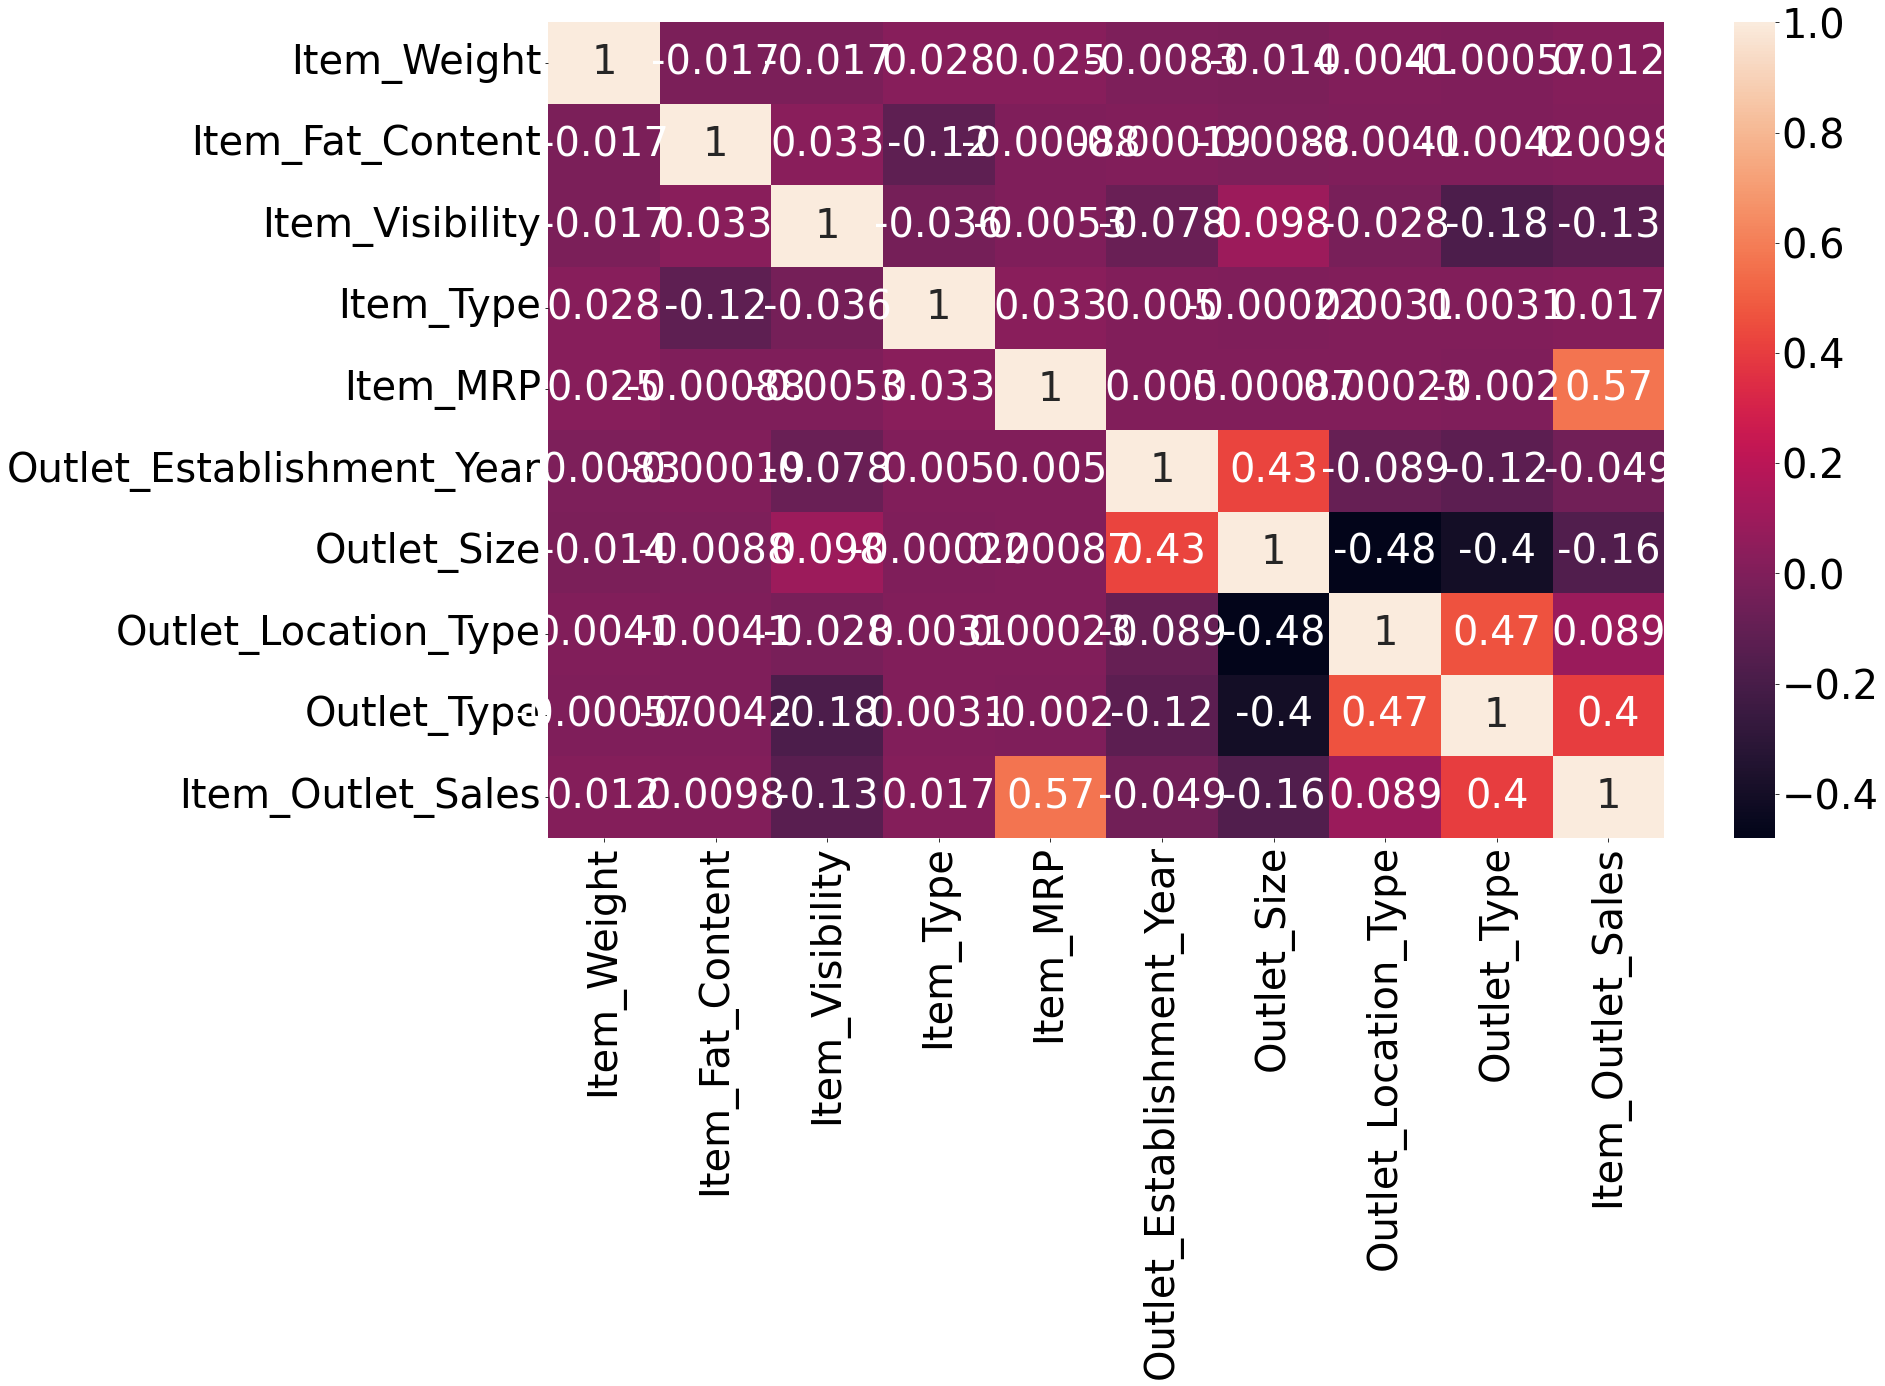

In [68]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [69]:
#VIF variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
y = df['Item_Outlet_Sales']
X = sm.add_constant(x)

In [70]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]

In [71]:
vif_data

,feature,VIF
0,Item_Weight,10.276208
1,Item_Fat_Content,5.593283
2,Item_Visibility,3.203637
3,Item_Type,4.011645
4,Item_MRP,6.136741
5,Outlet_Establishment_Year,41.460344
6,Outlet_Size,7.702415
7,Outlet_Location_Type,4.266219
8,Outlet_Type,4.553637


In [72]:
#df.drop(columns='Outlet_Establishment_Year',inplace =True)

In [73]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [74]:
x.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.017331,-0.017450,0.028015,0.024756,-0.008301,-0.014105,0.004088,-0.000566
Item_Fat_Content,-0.017331,1.000000,0.033004,-0.115958,-0.000876,-0.000189,-0.008770,-0.004102,-0.004214
Item_Visibility,-0.017450,0.033004,1.000000,-0.036000,-0.005259,-0.078355,0.097533,-0.027859,-0.179604
Item_Type,0.028015,-0.115958,-0.036000,1.000000,0.032651,0.004970,-0.000218,0.003084,0.003053
Item_MRP,0.024756,-0.000876,-0.005259,0.032651,1.000000,0.005020,0.000872,0.000232,-0.001975
Outlet_Establishment_Year,-0.008301,-0.000189,-0.078355,0.004970,0.005020,1.000000,0.425534,-0.089216,-0.122304
Outlet_Size,-0.014105,-0.008770,0.097533,-0.000218,0.000872,0.425534,1.000000,-0.480075,-0.401373
Outlet_Location_Type,0.004088,-0.004102,-0.027859,0.003084,0.000232,-0.089216,-0.480075,1.000000,0.467219
Outlet_Type,-0.000566,-0.004214,-0.179604,0.003053,-0.001975,-0.122304,-0.401373,0.467219,1.000000


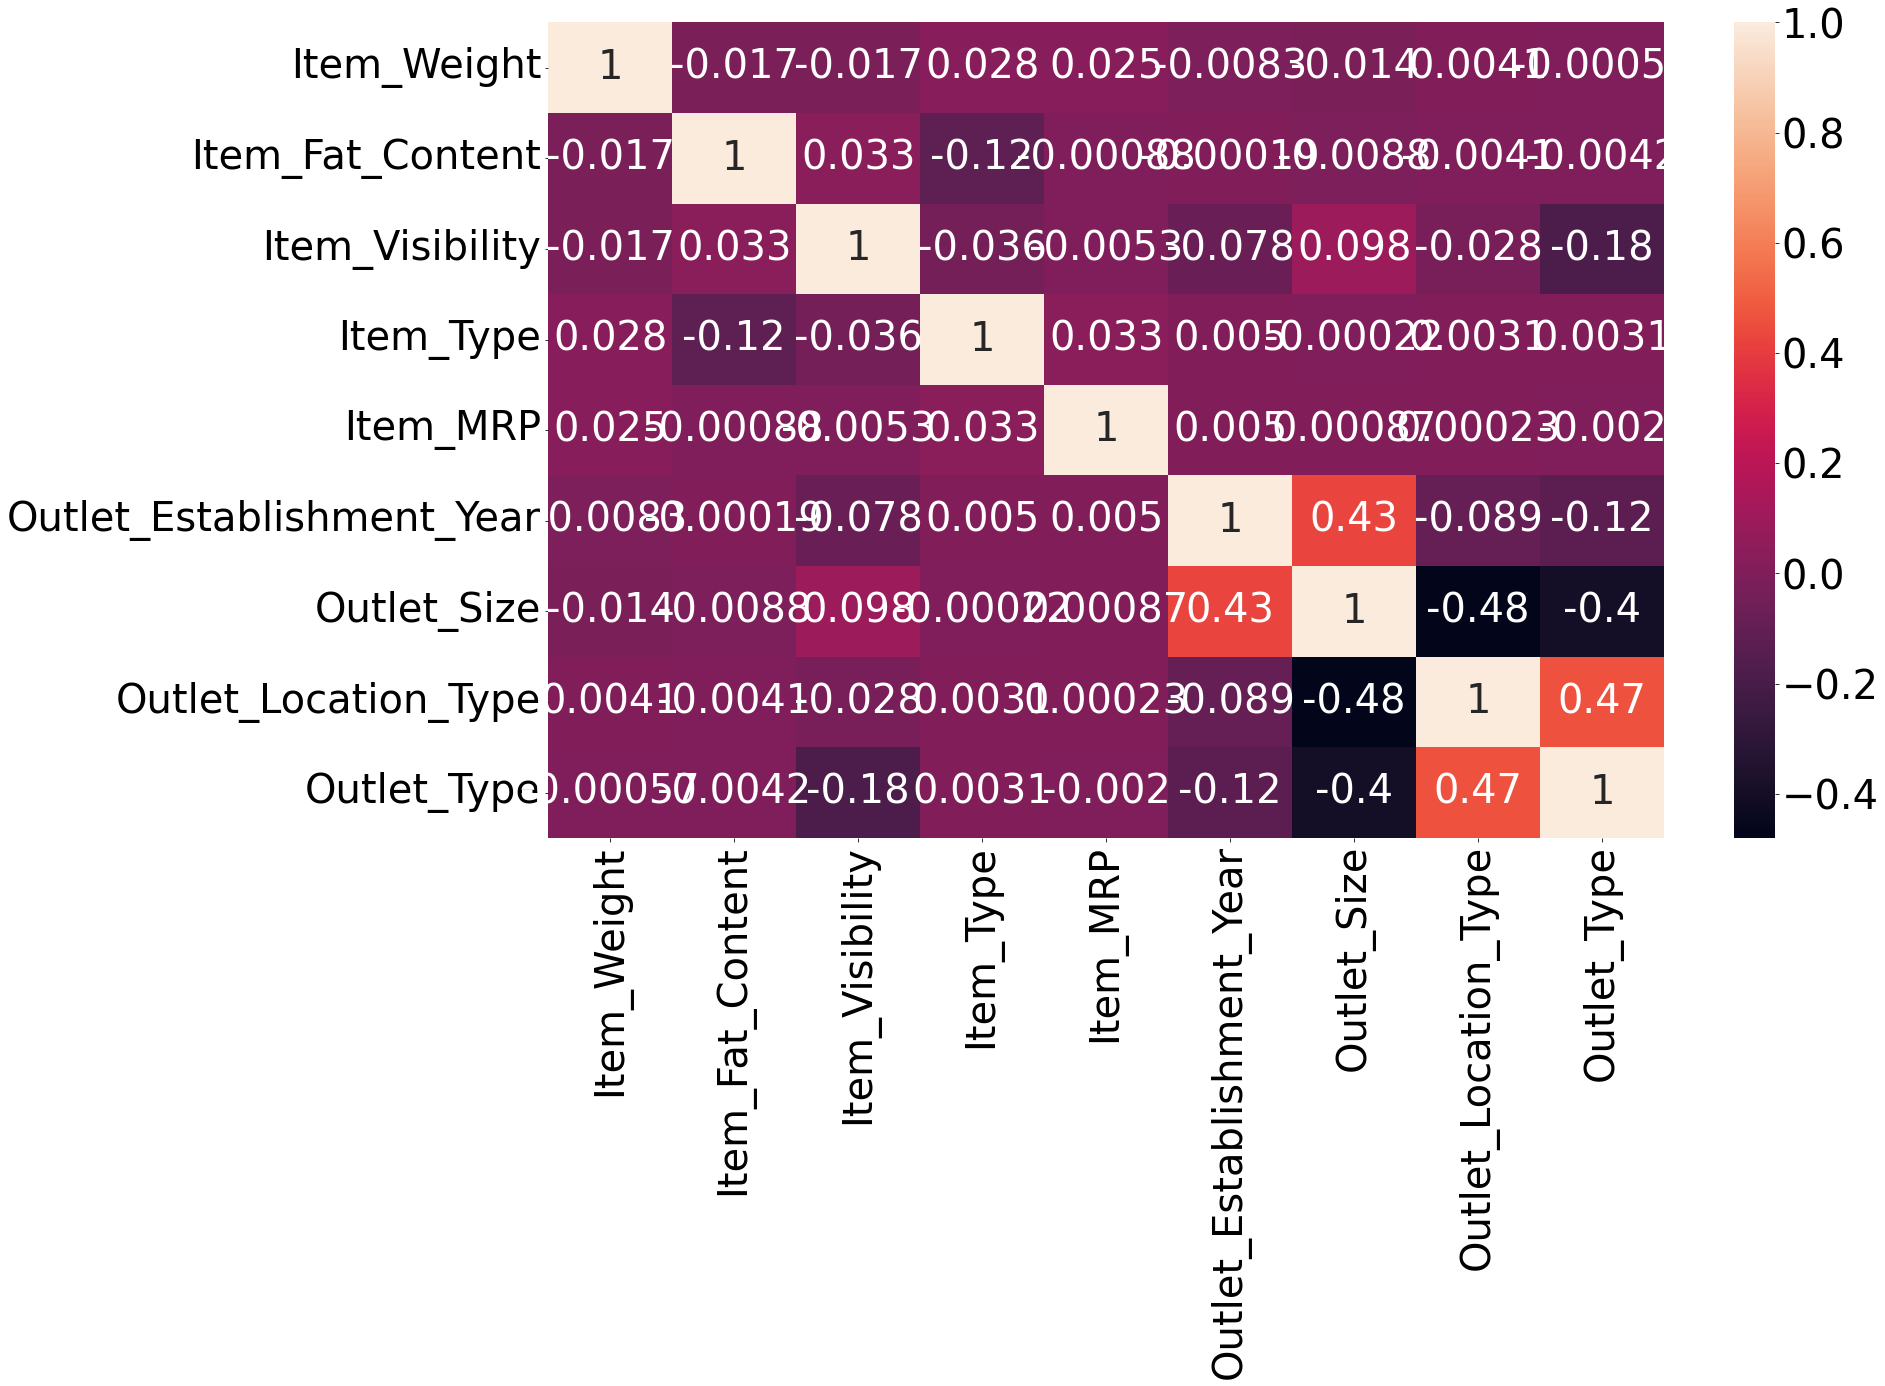

In [75]:
plt.figure(figsize=(25,15))

sns.heatmap(x.corr(),annot=True)
plt.show()

In [76]:
train_df =df # this is the final data set
train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.066132,6,182.0950,1998,2,2,0,732.3800
4,8.930,1,0.066132,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [79]:
x=train_df.drop(columns='Item_Outlet_Sales')
y=train_df['Item_Outlet_Sales']

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [90]:
import statsmodels.api as sm  
from sklearn.linear_model import LinearRegression

In [88]:
lm1 = sm.OLS(y_train,x_train).fit() 

In [89]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              3277.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):                        0.00
Time:                        12:42:08   Log-Likelihood:                         -57964.
No. Observations:                6818   AIC:                                  1.159e+05
Df Residuals:                    6809   BIC:                                  1.160e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight                  -4.0265      3.414     -1.179      0.238     -10.719       2.666
Item_Fat_Content             19.5828     22.773      0.860      0.390     -25.060      64.226
Item_Visibility           -1723.0740    302.752     -5.691      0.000   -2316.563   -1129.585
Item_Type                     0.4159      3.457      0.120      0.904      -6.360       7.192
Item_MRP                     15.6046      0.232     67.171      0.000      15.149      16.060
Outlet_Establishment_Year    -0.2696      0.046     -5.817      0.000      -0.360      -0.179
Outlet_Size                -105.4064     24.932     -4.228      0.000    -154.281     -56.532
Outlet_Location_Type       -285.4191     21.661    -13.177      0.000    -327.882    -242.956
Outlet_Type                 935.2172     21.424     43.654      0.000     893.220     977.214
==============================================================================
Omnibus:                      641.615   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.252
Skew:                           0.598   Prob(JB):                    5.21e-300
Kurtosis:                       4.850   Cond. No.                     4.20e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
test_df = pd.read_csv(r'C:\Users\pbann\OneDrive\Desktop\science\data set\store sales prediction\test.csv')
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [122]:
test_df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)


In [123]:
test_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1


In [124]:
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(),inplace=True)

# OUtlet_Size

In [125]:
mode_df1=test_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_df1

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [126]:
miss_values = test_df['Outlet_Size'].isnull()

In [127]:
test_df.loc[miss_values, 'Outlet_Size'] = test_df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_df[x])

# test data encoding

In [128]:
train_df['Item_Visibility']=train_df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())

In [129]:
encoder = LabelEncoder()

test_df['Item_Fat_Content'] = encoder.fit_transform(test_df['Item_Fat_Content'])

test_df['Item_Type'] = encoder.fit_transform(test_df['Item_Type'])


test_df['Outlet_Size'] = encoder.fit_transform(test_df['Outlet_Size'])

test_df['Outlet_Location_Type'] = encoder.fit_transform(test_df['Outlet_Location_Type'])
test_df['Outlet_Type'] = encoder.fit_transform(test_df['Outlet_Type'])


NameError: name 'LabelEncoder' is not defined

In [130]:
train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.066132,6,182.0950,1998,2,2,0,732.3800
4,8.930,1,0.066132,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [131]:
x=train_df.iloc[:,0:8]
y=train_df.iloc[:,-1]

In [132]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [134]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

In [135]:
models={
    'Linear Regression': LinearRegression(),
    'Linear Regression(Ridge)': Ridge(),
    'Linear Regression(lasso)': Lasso(),
    'Support vector Regression': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

In [136]:
for model_name,model in models.items():
    model.fit(x_train, y_train)
    print(model_name,'trained')


Linear Regression trained
Linear Regression(Ridge) trained
Linear Regression(lasso) trained
Support vector Regression trained
DecisionTreeRegressor trained
Random Forest Regressor trained


In [137]:

for model_name,model in models.items():
    y_pred = model.predict(x_test)
    mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
    print(model_name,"MAPE: {:.3f}".format(mape))



Linear Regression MAPE: 131.951
Linear Regression(Ridge) MAPE: 131.977
Linear Regression(lasso) MAPE: 132.067
Support vector Regression MAPE: 177.820
DecisionTreeRegressor MAPE: 73.803
Random Forest Regressor MAPE: 60.377


In [138]:
for model_name,model in models.items():
    
    print(model_name)
    print("Train Scores")
    adj_r2 = 1 - (1-model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
    print("    Accuracy Score: {:.2f}".format(adj_r2))
    print("    r2: {:.2f}".format(model.score(x_train, y_train)))
    
    print("Test Scores")
    adj_r2 = 1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print("    Accuracy Score: {:.2f}".format(adj_r2))
    print("    r2: {:.2f}".format(model.score(x_test, y_test)))

    print("_______________________________")

Linear Regression
Train Scores
    Accuracy Score: 0.36
    r2: 0.36
Test Scores
    Accuracy Score: 0.36
    r2: 0.36
_______________________________
Linear Regression(Ridge)
Train Scores
    Accuracy Score: 0.36
    r2: 0.36
Test Scores
    Accuracy Score: 0.36
    r2: 0.36
_______________________________
Linear Regression(lasso)
Train Scores
    Accuracy Score: 0.36
    r2: 0.36
Test Scores
    Accuracy Score: 0.36
    r2: 0.36
_______________________________
Support vector Regression
Train Scores
    Accuracy Score: -0.05
    r2: -0.05
Test Scores
    Accuracy Score: -0.06
    r2: -0.05
_______________________________
DecisionTreeRegressor
Train Scores
    Accuracy Score: 1.00
    r2: 1.00
Test Scores
    Accuracy Score: 0.23
    r2: 0.23
_______________________________
Random Forest Regressor
Train Scores
    Accuracy Score: 0.94
    r2: 0.94
Test Scores
    Accuracy Score: 0.56
    r2: 0.56
_______________________________


In [140]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train1, y_train1)


NameError: name 'x_train1' is not defined

In [141]:
import xgboost 
from xgboost import XGBRegressor
from sklearn import metrics

ModuleNotFoundError: No module named 'xgboost'

In [142]:
file = "model2.pkl"   # sav bytecode format
pickle.dump(linear_regression_model, open(file, 'wb'))

NameError: name 'pickle' is not defined

In [2]:
regressor = XGBRegressor()

NameError: name 'XGBRegressor' is not defined

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
from sklearn.ensemble import XGBRegressor

ImportError: cannot import name 'XGBRegressor' from 'sklearn.ensemble' (C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [146]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(x_train,y_train)

# Making Predictions
y_pred = RF.predict(x_test)

In [147]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [155]:
from sklearn.model_selection import cross_val_score
cross_val(RF,RandomForestRegressor(),x,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.58
0.53
0.51
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55


In [1]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor